In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:

data = []
targets = []

features = ["sex", "length", "diameter", "height", "whole weight",
                "shucked weight", "viscera weight", "shell weight", "rings"]

with open("C:/Users/lenovo/Google Drive/PHAP/2IS/Semestre2/CI/PRJ1/Data/abalone.data", newline='') as csvfile:
    abalonereader = csv.reader(csvfile, delimiter=',')
    for row in abalonereader:
        #print(row)
        if row[0] == "M":
            row[0] = 1
        if row[0] == "F":
            row[0] = 2
        if row[0] == "I":
            row[0] = 3
        for i in range(1, 7):
            row[i] = float(row[i])
        data.append(row[:7])
        targets.append(float(row[8]))


In [3]:
data = np.array(data)
targets = np.array(targets)
#print(data)
#print(targets)

data2 = np.delete(data,0,axis=1)
#data2 = np.delete(data2,2,axis=1)
#print(data2)

X_train, X_test, y_train, y_test = train_test_split(data2, targets, random_state=0)
#print(X_train.shape)
#plot the predictions vs rel values

mlp = MLPRegressor(solver ='lbfgs', activation='relu',hidden_layer_sizes=(50,10,5),max_iter = 500)

mlp.fit(X_train,y_train)
predictions = mlp.predict(X_train)
ypredictions = mlp.predict(X_test)

In [8]:
def scatter_y(true_y, predicted_y):

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')

    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')

    mlp = (true_y - predicted_y).std()

    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % mlp,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)

    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
   
    return mlp

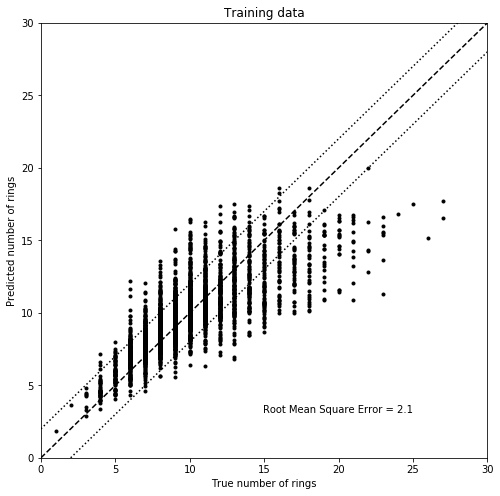

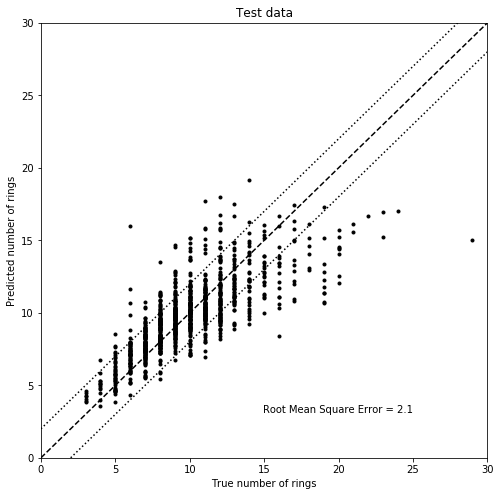

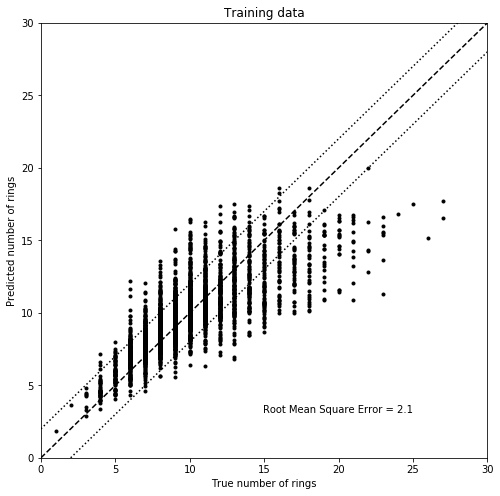

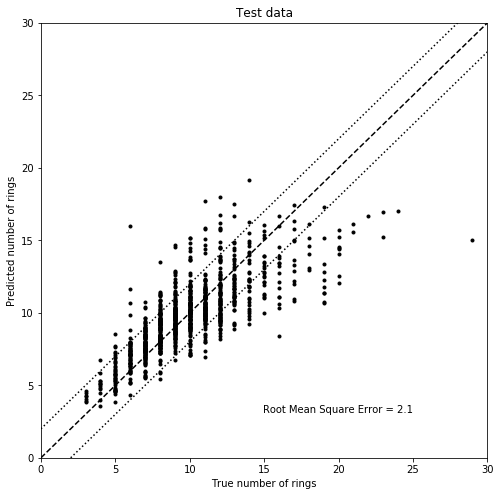

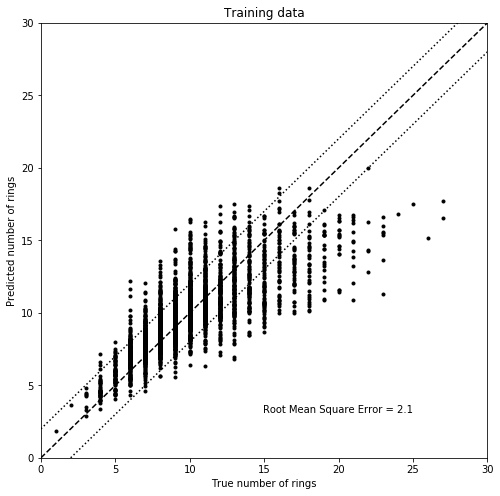

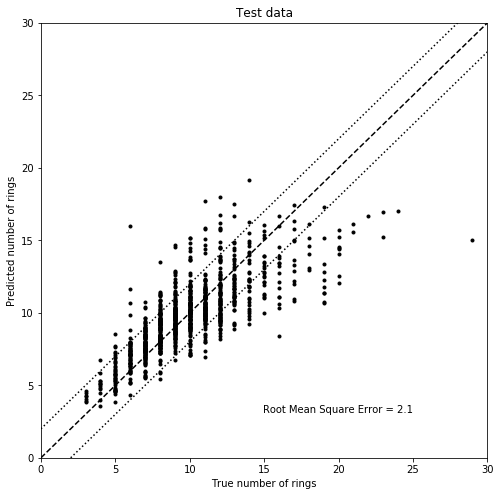

In [9]:
scatter_y(y_train, predictions)
plt.title("Training data")
scatter_y(y_test,ypredictions)
plt.title("Test data");

plt.show()

In [10]:
print('Accuracy testing : {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy testing : 0.591
